# Домашнее задание 6: KMeans и картинки

Привет!

В этом задании мы напишем свой KMeans, разберёмся в особенностях его работы и применим его для сжатия картинок.


**Оформление дз**:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.
В первой задаче требуется писать формулы - можно сделать это прямо в ноутбуке с помощью Latex, а можно прикрепить фотографию решения к заданию.

Вопросы можно присылать туда же, или в наш чат телеграма.

За это задание можно получить до 10 баллов (+5 бонусных).

**Дедлайн: 18 мая 23:59**

При составлении использованны материалы Stanford CS229.

## 0. Повторение

Давайте ещё раз вспомним, как работает KMeans:

**Входные данные:** $X$ - обучающая выборка

**Гиперпараметры:** $K$ - число извлекаемых кластеров, $\text{tol}$ - критерий остановки (см. далее) 

**Минимизируемая ошибка:** $\mathcal{L}(x) = \sum_{x \in X} \text{min}_{i=1,\ldots,K}\|x-c_i\|^2$, где $c_i$ - центр $i$-го кластера (проще говоря, сумма квадратов расстояний до ближайшего центра)

**Алгоритм:**

1. Выбрать из $X$ $K$ случайных объектов $(с_1, \ldots, c_K)$, и сделать их центрами кластеров.

1. Для каждого $i = 1, \ldots, K$ выбрать кластер $C_i$ как те точки из $X$, которые ближе всего к $c_i$.

1. Обновить центры кластеров: $c_i = \frac{1}{|C_i|}\sum_{x \in C_i}x$.

1. Повторять шаги $2$ и $3$ до тех пор, пока $\frac{\mathcal{L}{x}^{\text{new}}}{\mathcal{L}{x}^{\text{old}}}$ после очередного шага не станет меньше чем $(1 - \text{tol})$.

Пример работы с $K = 2$:

<img src="https://i.ytimg.com/vi/IJt62uaZR-M/maxresdefault.jpg" width="600">

## 1. Теория, или что нужно знать о KMeans

1. (3 балла) Давайте докажем, что KMeans действительно минимизирует $\mathcal{L}$, хотя бы в одномерном случае. Это проще увидеть так:
    
    1. (2 балла) Пусть $S$ - набор точек с центром масс $c_S$ (т.е. $c_S = \frac{1}{|S|}\sum_{x\in S}x$),
        тогда для любого $z$ верно равенство:
        
        $\sum_{x\in S}(x-z)^2 - \sum_{x \in S}(x - c_S)^2 = |S|(c_S - z)^2$.
        
        Это просто, не дайте обозначениям запутать вас! Например, начните с $S = 2$, а затем обобщите.
        
    1. (1 балл) Опираясь на п.A, докажите, что при переходе от шага $2$ к шагу $3$ ошибка действительно уменьшается.
    
1. (1 балл) Приведите пример, в котором KMeans достигает локального, но не глобального минимума $\mathcal{L}$. Можно ли как-то бороться с такой проблемой? Если можно, то как?

1. (1 балл) Где можно использовать KMeans, помимо сжатия картинок? Какие у него особенности (вам поможет картинка  с лекции с примерами работы: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html )?

## 2. Практика

**Задание**

1. Реализуйте свой KMeans, написав методы класса CustomKMeans. Некоторые функции реализованны за вас. Можно пользоваться методом euclidean_distances из sklearn.metrics. **Не пишите циклы по элементам выборки X.** Внимательно читайте комментарии!
1. (3 балла) Сравните свой KMeans с "табличным" на паре примеров и получите схожие результаты:
    1. (1 балл) На примере с "пятнами" make_blobs.
    1. (2 балла) На более сложном примере с make_circles (вам поможет ваш ответ в задаче $2$ первой части).

**Не меняйте код в ячейках с созданием выборок $X$ и их отрисовкой!**

In [1]:
import numpy as np
from sklearn.base import ClusterMixin
from sklearn.metrics import euclidean_distances

In [2]:
class CustomKMeans(ClusterMixin):
    """
    KMeans кластеризация, схему работы см. в п.0 
    
    Параметры:
    ----------
    
    n_clusters : int, optional, default: 8
        Число кластеров, K в обозначениях п.0
    
    max_iter: int, default: 300
        Максимальное число итераций
    
    tol: float, default: 0.0001
        Критерий остановки
    
    random_state: int, optional, default: 42
        Число для генератора, выбирающего первоначальные центры
    
    Атрибуты:
    ----------
    
    cluster_centers_: array, [n_clusters, n_features]
        Координаты центров кластеров или c_i в обозначениях п.0
    
    labels_: array, [n_examples, ]
        Метки кластера для каждого элемента X
    
    inertia_: float
        Текущее значение минимизируемой ошибки L
    
    """
    
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=12):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.inertia_  = 1e10
    
    def fit(self, X):
        """
        Вычислить центры кластеров с помощью KMeans
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        self: CustomKMeans class
            Обученный класс
        """
        **инициализируемся**
        self.init_clusters(X)
        for i in range(self.max_iter):
            **что-то делаем**
            **проверяем сходимость**
        return self
    
    def predict(self, X_new):
        """
        Вернуть метки для новой выборки X_new
        
        Вход:
        ----------
        X_new: array, [n_examples, n_features]
            Тестовая выборка
        
        Возвращаемое значение:
        ----------
        preds: array, [n_examples, ]
            Предсказанные метки классов
        """
        return **Предсказания**
    
    def fit_predict(self, X):
        """
        Вычислить центры кластеров с помощью KMeans и вернуть метки
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        labels_: array, [n_examples, ]
            Метки кластера для каждого элемента X
        """
        return self.fit(X).labels_
    
    def init_clusters(self, X):
        """
        Случайная инициализация центров
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
            
        Возвращаемое значение:
        ----------
        None
        """
        # Немного магии...
        np.random.seed(self.random_state)
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False), :]
    
    def update_clusters(self, X):
        """
        Обновить метки, к каким кластерам принадлежат элементы обучающей выборки, п.2
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        None
        """
        **Обновляем метки**
    
    def update_centers(self, X):
        """
        Обновить центры каждого кластера, п.3
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        None
        """
        **Обновляем центры кластеров**

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans
%matplotlib inline
# Простой пример для дебага

colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf'])

def plot_comparison(X, labels1, labels2):
    plt.figure(figsize=(16,4))
    plt.subplot(131, title='My KMeans')
    plt.scatter(X[:,0], X[:,1], c=colors[labels1])
    
    plt.subplot(132, title='Default KMeans')
    plt.scatter(X[:,0], X[:,1], c=colors[labels2])
    plt.show()

ex_X_1, _ = make_blobs(n_samples=300, random_state=42)

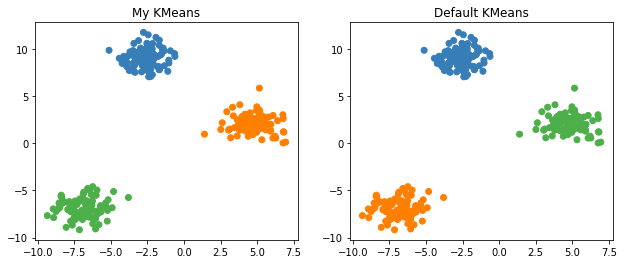

In [4]:
my_preds = **Предсказания нашей модели**
def_preds = KMeans(n_clusters=3).fit_predict(ex_X_1)

plot_comparison(ex_X_1, my_preds, def_preds)

In [5]:
# Пример чуть сложнее
ex_X_2, _ = make_circles(n_samples=300, factor=0.5, noise=0.08)

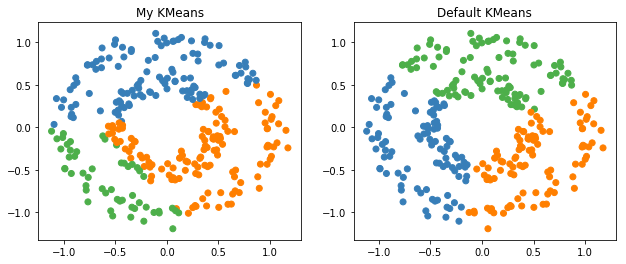

In [6]:
my_preds = **Предсказания нашей модели**
def_preds = KMeans(n_clusters=3).fit_predict(ex_X_2)

plot_comparison(ex_X_2, my_preds, def_preds)

## 3. Применение

Давайте научимся сжимать картинки с помощью KMeans.

Скачаем несколько примеров:
(если wget и mkdir не работают, надо а) создать папку img в той же директории и б) перейти по ссылкам и скачать картинки)

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances
from sklearn.utils import shuffle

from matplotlib.image import imread, imsave

In [8]:
!mkdir img
!wget -O img/im_ex_1.jpg https://i.ytimg.com/vi/I2xVR_aFtj8/mqdefault.jpg
!wget -O img/im_ex_2.jpg https://lh3.googleusercontent.com/WSSVT4FQK0XSADAQ2d63GdAxn_8FUkYM4LScSHonpEA=w320-h180-p
!wget -O img/im_ex_3.jpg http://i1.wp.com/ytimg.googleusercontent.com/vi/sBOtC5jNmHk/mqdefault.jpg

mkdir: cannot create directory ‘img’: File exists
--2018-05-09 17:22:21--  https://i.ytimg.com/vi/I2xVR_aFtj8/mqdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 212.188.35.56, 212.188.35.21, 212.188.35.41, ...
Connecting to i.ytimg.com (i.ytimg.com)|212.188.35.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12332 (12K) [image/jpeg]
Saving to: ‘img/im_ex_1.jpg’

img/im_ex_1.jpg     100%[===================>]  12,04K  --.-KB/s    in 0,02s   

2018-05-09 17:22:21 (595 KB/s) - ‘img/im_ex_1.jpg’ saved [12332/12332]

--2018-05-09 17:22:21--  https://lh3.googleusercontent.com/WSSVT4FQK0XSADAQ2d63GdAxn_8FUkYM4LScSHonpEA=w320-h180-p
Resolving lh3.googleusercontent.com (lh3.googleusercontent.com)... 173.194.113.139, 173.194.113.138, 173.194.113.140, ...
Connecting to lh3.googleusercontent.com (lh3.googleusercontent.com)|173.194.113.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27887 (27K) [image/jpeg]
Saving to: ‘img/im_ex_2.jpg’

im

Пример картинки:

<img src="img/im_ex_2.jpg" width="600">

В чём идея? Каждая из трёх картинок имеет разрешение 320x180 в 24-битном цвете.

Это значит, что для каждого из 57600 пикселей есть три 8-битных числа (от 0 до 255), отвечающие за интенсивность красного, зелёного и синего цветов. В таком представлении картинка весит 57600x3=172800 байтов.

Мы сожмём картинку так, чтобы каждый пиксель имел один из 8-ми цветов. Для этого, мы представим её как обучающую выборку размерности (320x180,3) и сделаем кластеризацию на 8 классов.

**Задание:**

1. (2 балла) Проделайте это. Выгрузка картинки и отрисовка уже реализованны. Сравните результаты вашего KMeans с "табличным" и со случайной кластеризацией.
1. (\*) (2 балла) Попробуйте другие методы кластеризации вместо KMeans, например DBSCAN или Agglomerative Clustering. Какой из них даёт лучшей результат?
1. (\*) (3 балла) Почему ваш метод работает сильно хуже, чем библиотечный? Разберитесь, что такое KMeans++, и чем он помогает(вам потребуются знания теории вероятности).

In [9]:
def get_and_show_img(img_path, show=True):
    """
    Выгрузка картинки
    """
    original_img = imread(img_path)
    
    if show:
        plt.imshow(original_img)
        plt.show()
        print('Shape:', original_img.shape)
    return original_img

def get_rand_pred(original_img, n_colours=8):
    """
    Случайная кластеризация
    """
    X_true = original_img.reshape((-1,3))
    
    random_centers = shuffle(X_true, random_state=42)[:n_colours+1]
    
    y_random = pairwise_distances_argmin(random_centers, X_true, axis=0)
    # Обратите внимание на np.uint8 - он нужен, чтобы matplotlib нарисовал всё без ошибок
    return random_centers[y_random].reshape(original_img.shape).astype(np.uint8)

In [12]:
def get_def_kmeans_pred(original_img, n_colours=8):
    """
    "Табличный" KMeans
    """
    return **Центры кластеров**

def get_my_kmeans_pred(original_img, n_colours=8):
    """
    Кастомный KMeans
    """
    return **Центры кластеров**

In [13]:
# Получаем предсказания для трёх картинок
n_pictures = 3
n_colours = 8
all_img = []

for i in range(n_pictures):
    original_img = get_and_show_img('img/im_ex_'+str(i+1)+'.jpg', show=False)
    all_img += [original_img]
    
    def_kmeans_pred = get_def_kmeans_pred(original_img, n_colours)
    all_img += [def_kmeans_pred]
    
    my_kmeans_pred = get_my_kmeans_pred(original_img, n_colours)
    all_img += [my_kmeans_pred]
    
    rand_pred = get_rand_pred(original_img, n_colours)
    all_img += [rand_pred]

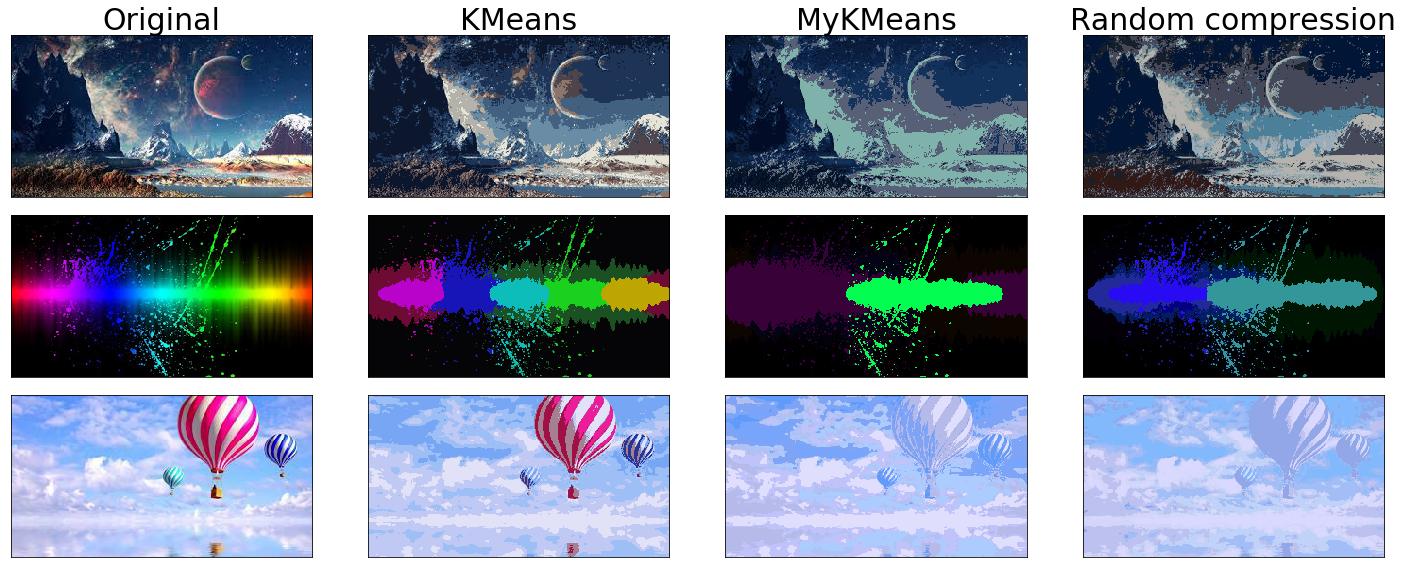

In [14]:
# Рисуем картинку
fig, axarr = plt.subplots(nrows=n_pictures, ncols=4, sharex=True, figsize=(20,8))

for ax, col in zip(axarr[0], ['Original', 'KMeans', 'MyKMeans', 'Random compression']):
    ax.set_title(col, fontsize=30)

for i in range(n_pictures):
    for j in range(4):
        axarr[i,j].imshow(all_img[i*4 + j])
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()